# Predicting Housing Prices in Ames, Iowa
The goal of this project is to model the housing prices with linear regression and have in-depth understanding in the determining factors in sale price. The project is divided into following steps:

1. [EDA and Cleaning](#eda-and-cleaning)
2. [Featuring Engineering](#feature-engineering)
3. [Preprocessing](./02_Preprocessing_and_Fitting_Model.ipynb)
4. [Fitting Model](./02_Preprocessing_and_Fitting_Model.ipynb#training-and-fitting-model)
5. [Predicting Housing Prices](./03_Predicting_and_Inferencing.ipynb#predict-housing-prices)
6. [Analysis](./03_Predicting_and_Analysing.ipynb)
6. [Summary](./03_Predicting_and_Inferencing.ipynb)

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## EDA and Cleaning

Load the dataset into variable `df`.

In [2]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Check for outliers in the data.

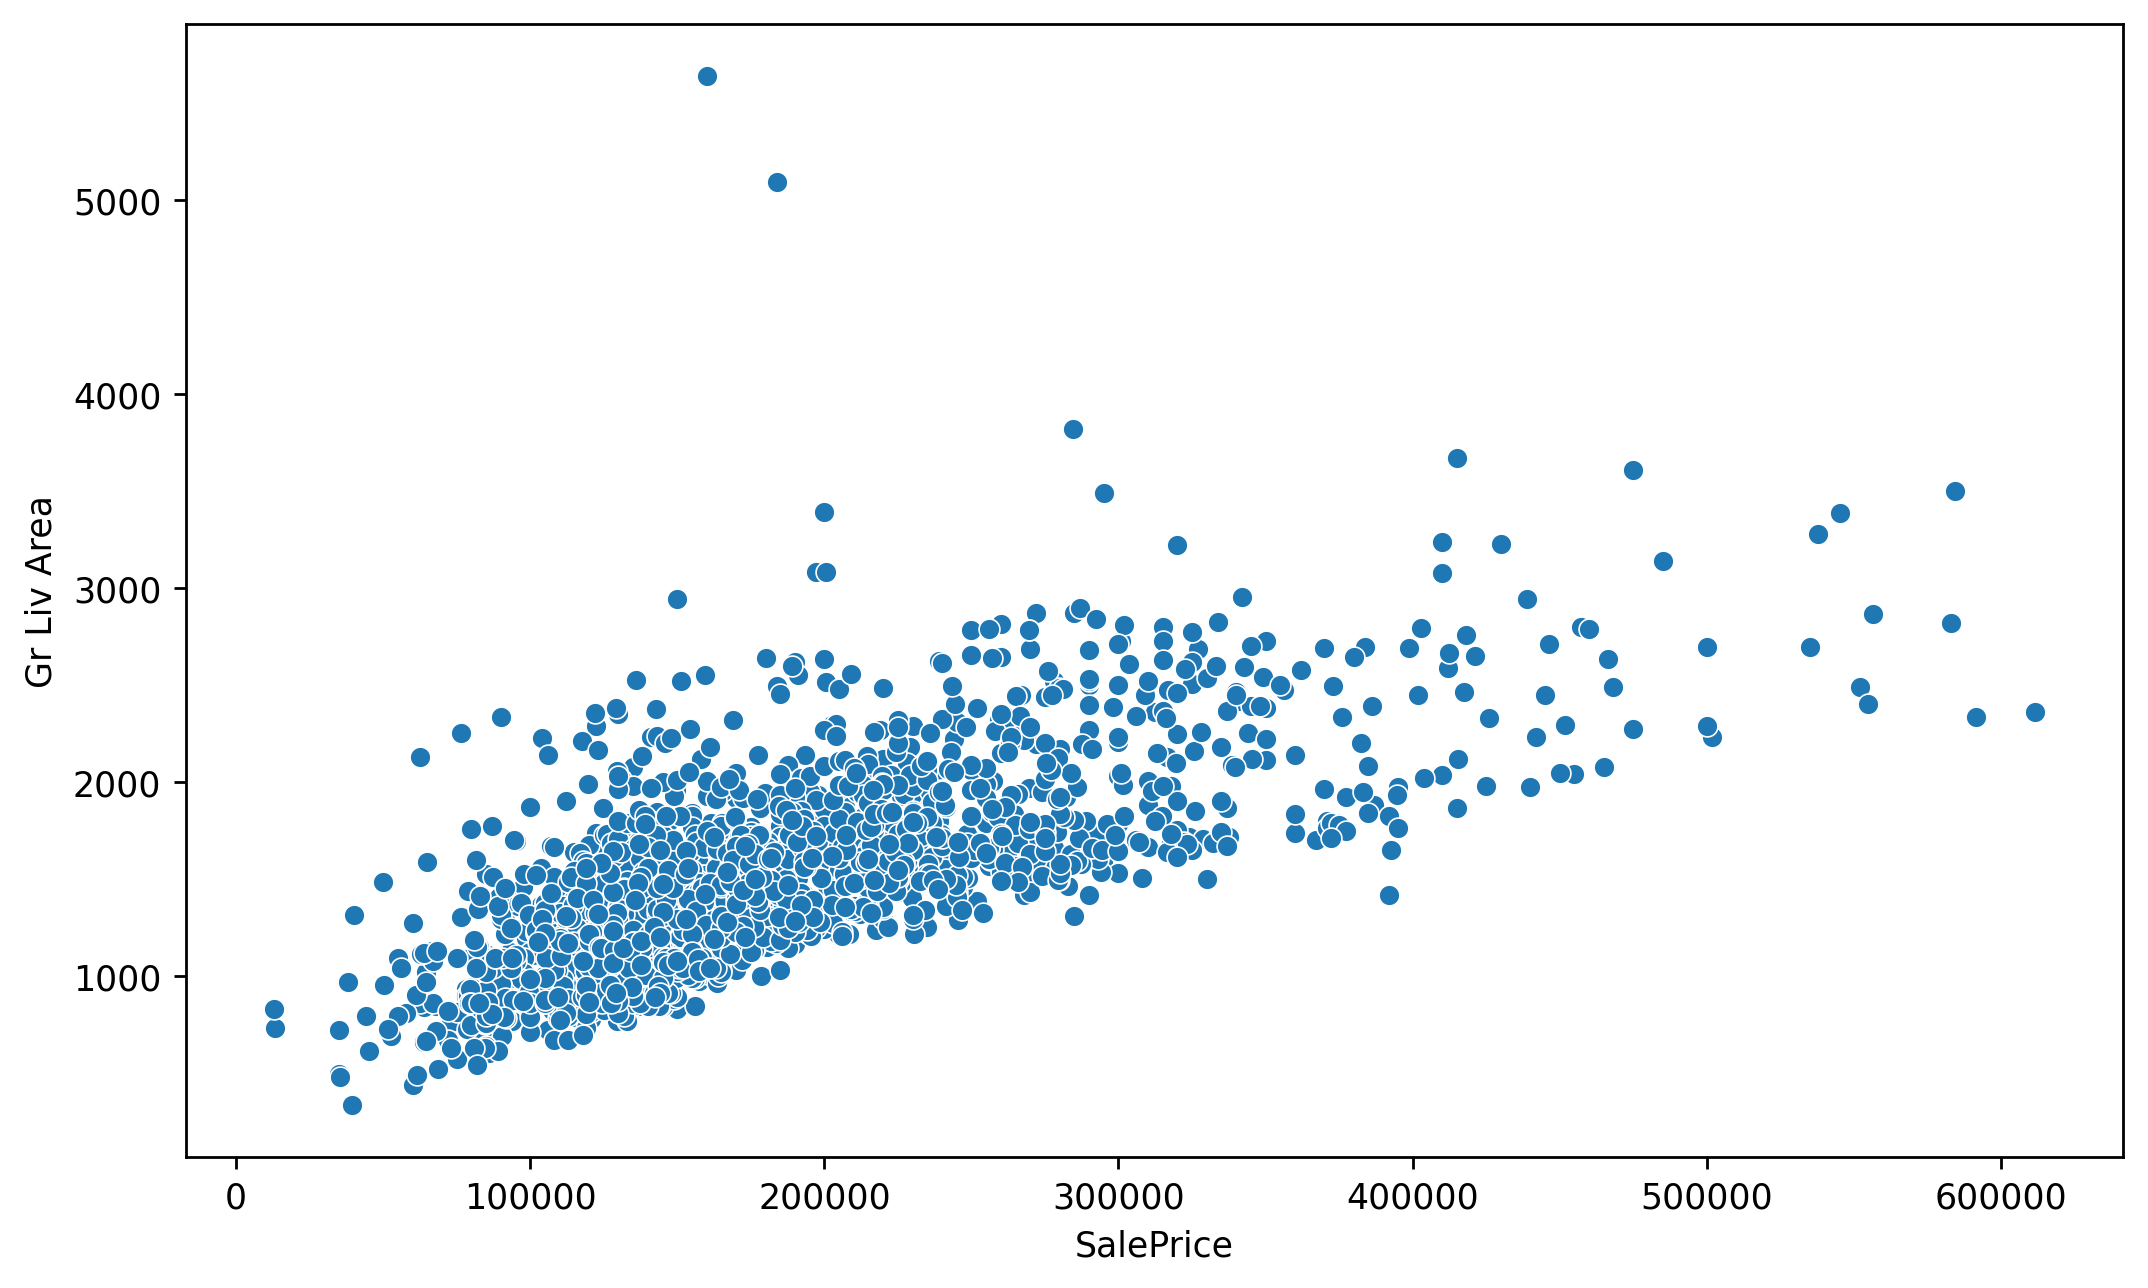

In [3]:
plt.figure(figsize=(10,6), dpi=250)
sns.scatterplot(x=df['SalePrice'], y=df['Gr Liv Area']);

In [4]:
df['Gr Liv Area'].sort_values(ascending=True)[-2:]

1885    5095
960     5642
Name: Gr Liv Area, dtype: int64

Drop the two outliers. 

In [5]:
df.drop(index=960, inplace=True)
df.drop(index=1885, inplace=True)

Explore the correlation of target value and features to assist in feature engineering.

In [6]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:11]

Overall Qual      0.803462
Gr Liv Area       0.719463
Total Bsmt SF     0.664819
Garage Area       0.655483
Garage Cars       0.648667
1st Flr SF        0.648252
Year Built        0.572405
Year Remod/Add    0.550872
Full Bath         0.538225
Garage Yr Blt     0.534514
Name: SalePrice, dtype: float64

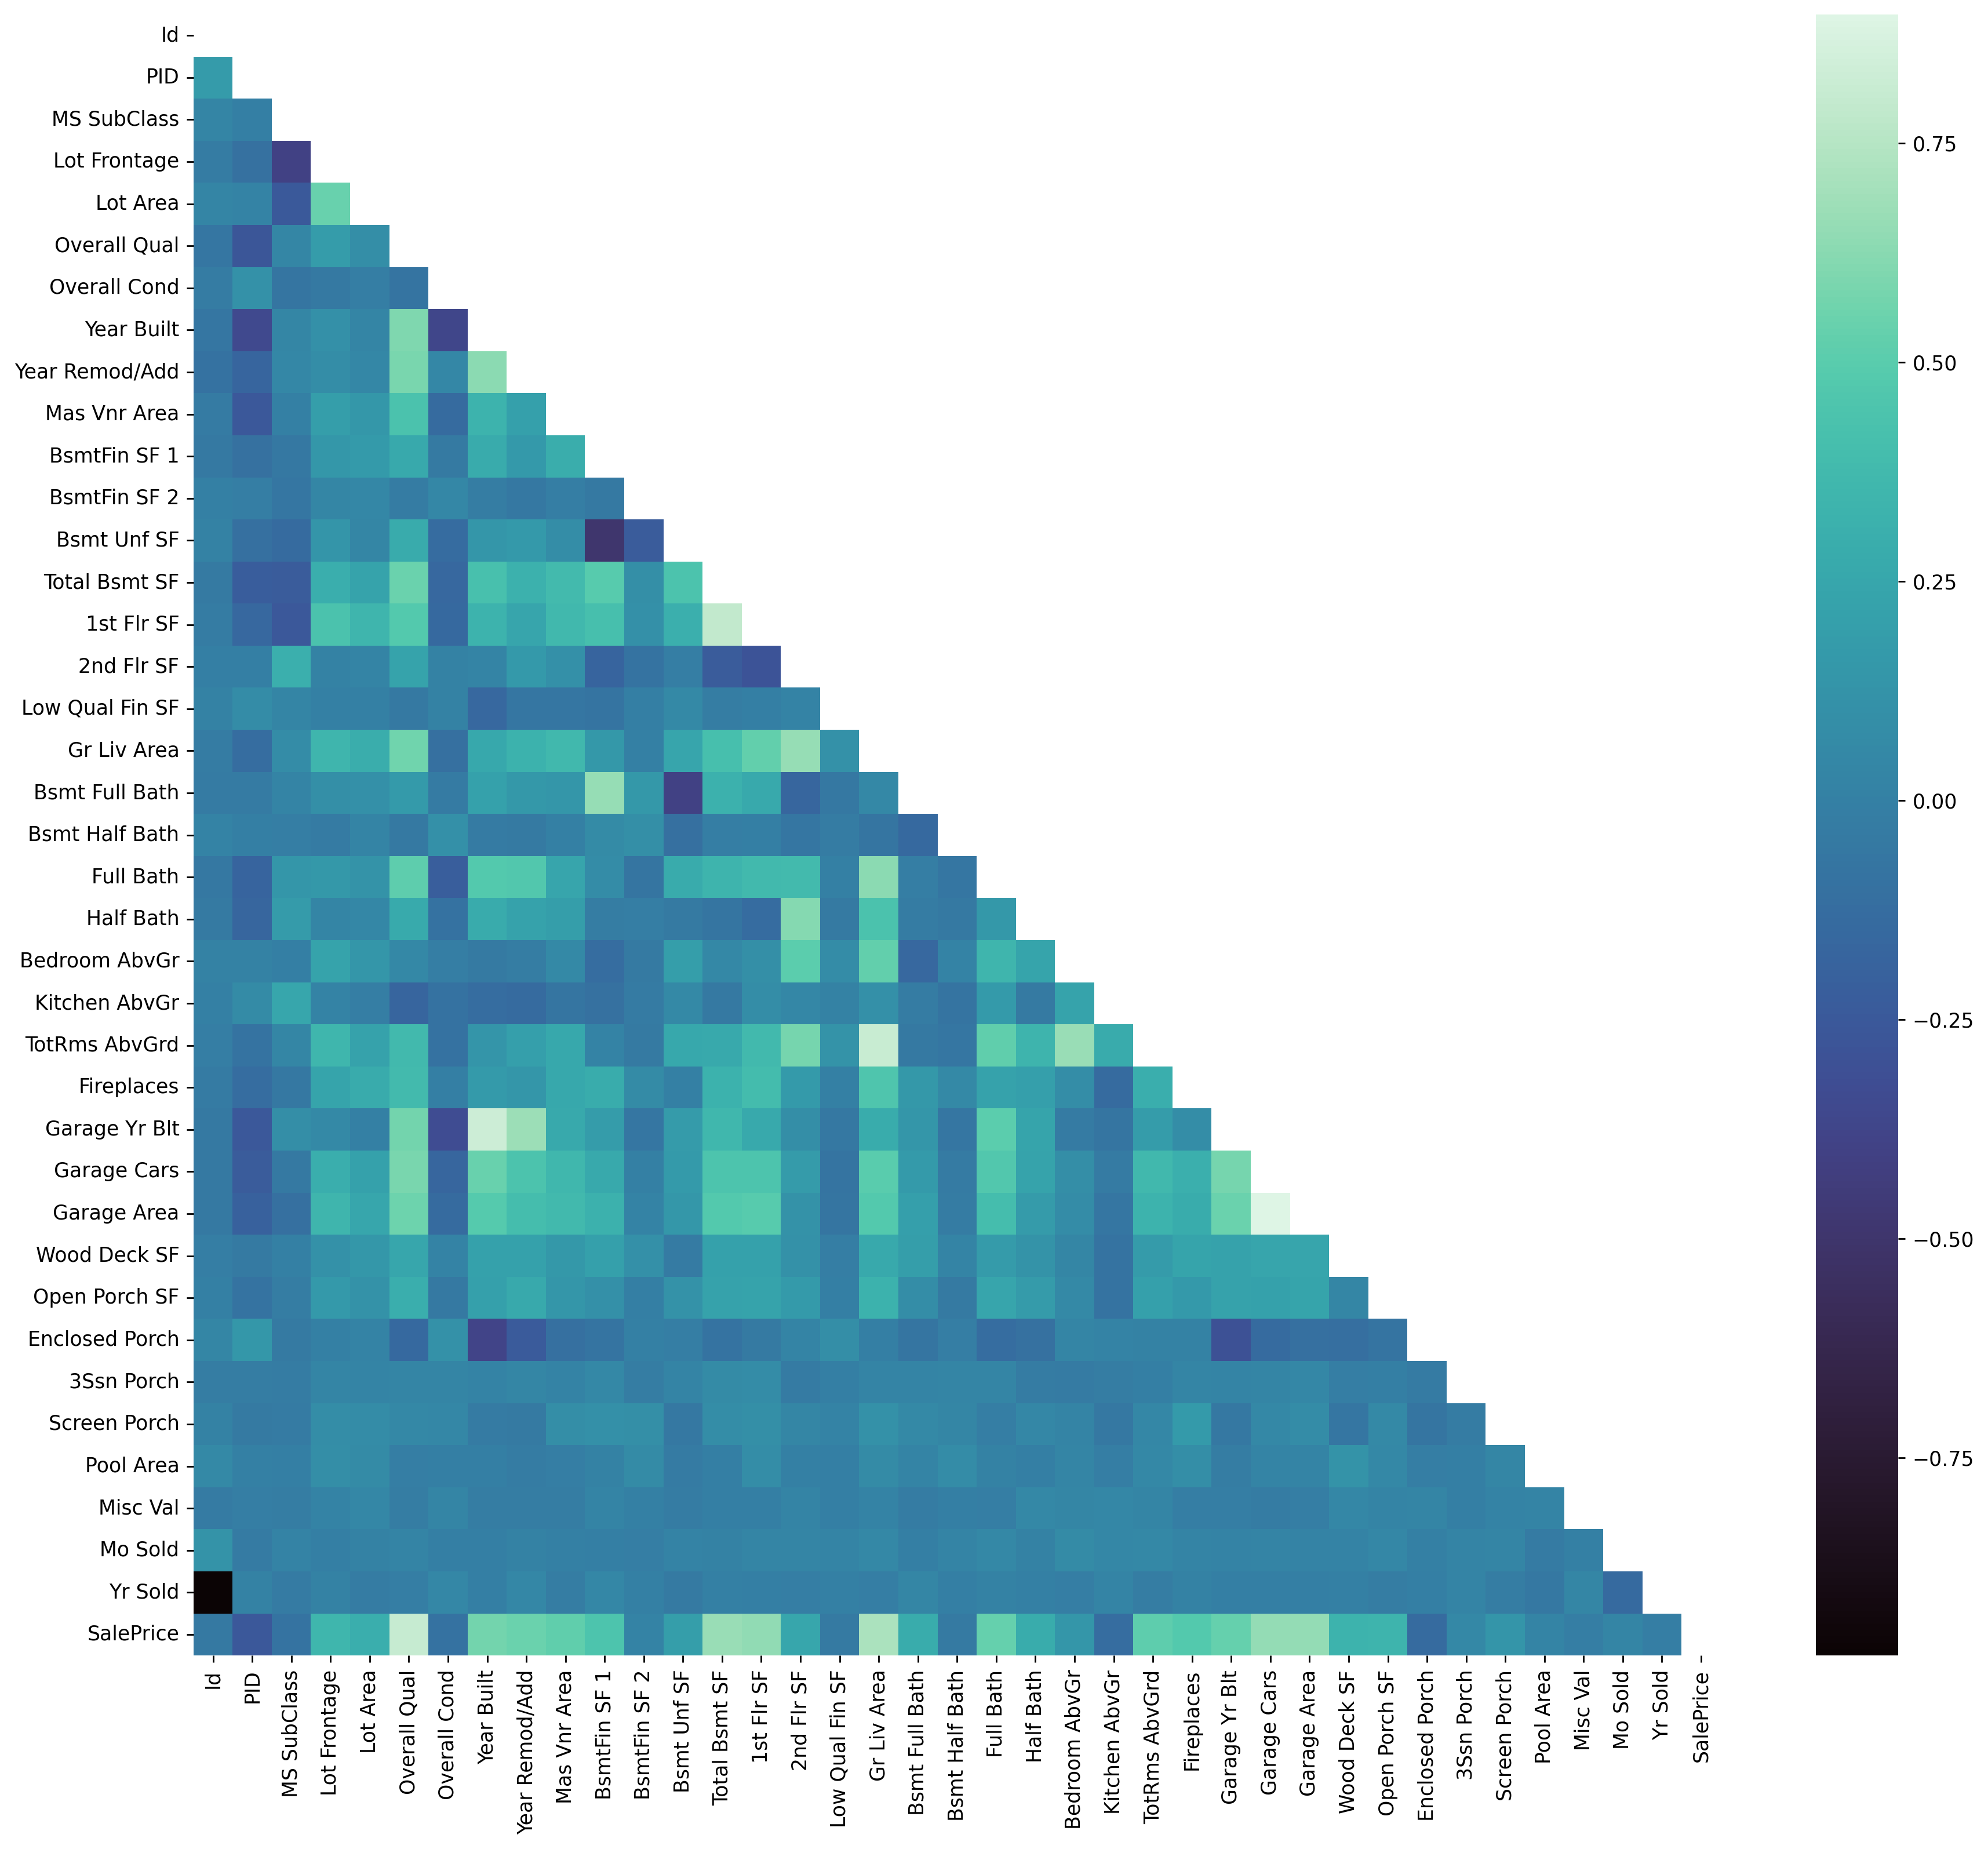

In [7]:
plt.figure(figsize=(17,15), dpi=250)

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, cmap='mako');

## Feature Engineering
Creating new column `Large Home`.

In [8]:
#df['Large Home'] = [1 if i > 3000 else 0 for i in df['Gr Liv Area']]

Create an interaction term `Toal Area`.

In [9]:
df['Total Area'] = df['Gr Liv Area'] * df['Total Bsmt SF'] * df['Garage Area']

Select features with high correlations to target value to build mode, and save into a new variable `clean_df`.

In [10]:
clean_df = df[['Overall Qual', 'Gr Liv Area','Total Bsmt SF', 'Garage Area','Neighborhood', 'Heating QC', 'Total Area']]

Create dummy features for non-numerical columns.

In [11]:
clean_df = pd.get_dummies(data=clean_df, columns=['Neighborhood'], drop_first=True)
clean_df = pd.get_dummies(data=clean_df, columns=['Heating QC'], drop_first=True)
clean_df = pd.get_dummies(data=clean_df, columns=['Overall Qual'], drop_first=True)

Add target `SalePrice` to the dataframe.

In [12]:
clean_df['SalePrice'] = df['SalePrice']

## Additional Cleaning

Check for data types to make sure they are valid for Linear Regression modeling

In [13]:
clean_df.dtypes

Gr Liv Area               int64
Total Bsmt SF           float64
Garage Area             float64
Total Area              float64
Neighborhood_Blueste      uint8
Neighborhood_BrDale       uint8
Neighborhood_BrkSide      uint8
Neighborhood_ClearCr      uint8
Neighborhood_CollgCr      uint8
Neighborhood_Crawfor      uint8
Neighborhood_Edwards      uint8
Neighborhood_Gilbert      uint8
Neighborhood_Greens       uint8
Neighborhood_GrnHill      uint8
Neighborhood_IDOTRR       uint8
Neighborhood_Landmrk      uint8
Neighborhood_MeadowV      uint8
Neighborhood_Mitchel      uint8
Neighborhood_NAmes        uint8
Neighborhood_NPkVill      uint8
Neighborhood_NWAmes       uint8
Neighborhood_NoRidge      uint8
Neighborhood_NridgHt      uint8
Neighborhood_OldTown      uint8
Neighborhood_SWISU        uint8
Neighborhood_Sawyer       uint8
Neighborhood_SawyerW      uint8
Neighborhood_Somerst      uint8
Neighborhood_StoneBr      uint8
Neighborhood_Timber       uint8
Neighborhood_Veenker      uint8
Heating 

Check for `NaN` values and drop the rows

In [14]:
clean_df.isnull().sum()

Gr Liv Area             0
Total Bsmt SF           1
Garage Area             1
Total Area              2
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Greens     0
Neighborhood_GrnHill    0
Neighborhood_IDOTRR     0
Neighborhood_Landmrk    0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
Heating QC_Fa           0
Heating QC_Gd           0
Heating QC_Po           0
Heating QC_TA           0
Overall Qual_2          0
Overall Qual_3          0
Overall Qual_4          0
Overall Qual

In [15]:
clean_df.dropna(inplace=True)

---

**Export** the cleaned dataframe for [next](02_Preprocessing_and_Model_Benchmarks.ipynb) step.

In [16]:
clean_df.to_csv('../datasets/clean_data.csv', index=False)
clean_df.head()

,Gr Liv Area,Total Bsmt SF,Garage Area,Total Area,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,SalePrice
0,1479,725.0,475.0,5.093306e+08,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,130500
1,2122,913.0,559.0,1.082999e+09,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,220000
2,1057,1057.0,246.0,2.748433e+08,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,109000
3,1444,384.0,400.0,2.217984e+08,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,174000
4,1445,676.0,484.0,4.727809e+08,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,138500
